### Clustering

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
#import data
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.shape

(200, 5)

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Kmeans Clustering

In [7]:
# Converting Genre into binary as Kmeans clustering works with numeric features
data.Genre = data.Genre.map({"Male":1, "Female":0})

In [8]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [9]:
# Removing customerID
data = data.drop("CustomerID", axis = 1)

In [10]:
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [11]:
# Selecting the number of clusters with elbow method

wss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)
    

Text(0,0.5,'Wss')

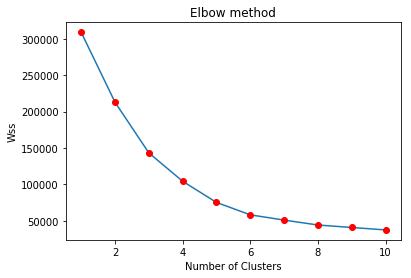

In [12]:
# plot the results
plt.plot(range(1,11),wss)
plt.plot(range(1,11),wss,'ro')
plt.title("Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("Wss")

In [13]:
# Taking 5 as optimal clusters and building the final cluster model
kmeans = KMeans(n_clusters=5,init="k-means++",max_iter=300,n_init=10,random_state=0)
y_predict = kmeans.fit_predict(data)

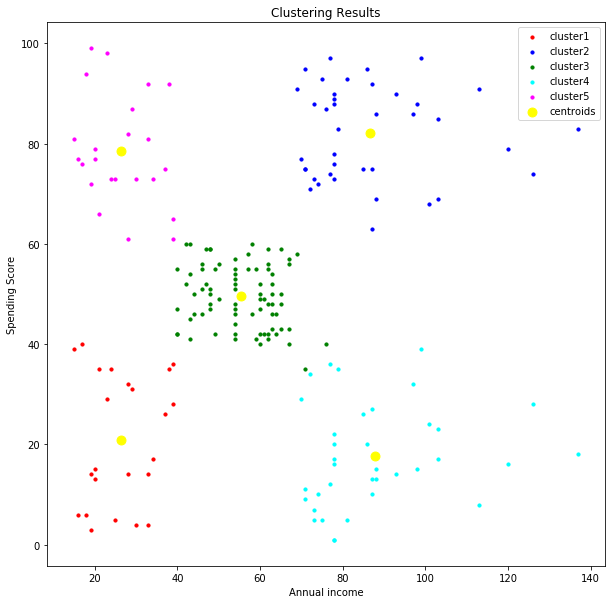

In [14]:
# Visualizing the cluster results
# Lets take only two features Annual Income and spending score for visualizing. We could also do PCA for visualizing
plt.figure(figsize=(10,10))
plt.scatter(data.iloc[y_predict == 0, 2],data.iloc[y_predict == 0, 3],s = 10,c="red",label = "cluster1" )
plt.scatter(data.iloc[y_predict == 1, 2],data.iloc[y_predict == 1, 3],s = 10,c="blue",label = "cluster2" )
plt.scatter(data.iloc[y_predict == 2, 2],data.iloc[y_predict == 2, 3],s = 10,c="green",label = "cluster3" )
plt.scatter(data.iloc[y_predict == 3, 2],data.iloc[y_predict == 3, 3],s = 10,c="cyan",label = "cluster4" )
plt.scatter(data.iloc[y_predict == 4, 2],data.iloc[y_predict == 4, 3],s = 10,c="magenta",label = "cluster5" )

#plot the centriods
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s = 80,c="yellow",label="centroids")
plt.title("Clustering Results")
plt.xlabel("Annual income")
plt.ylabel("Spending Score")
plt.legend()

#### Hierachical Clustering

Text(0,0.5,'Eclidean Distance')

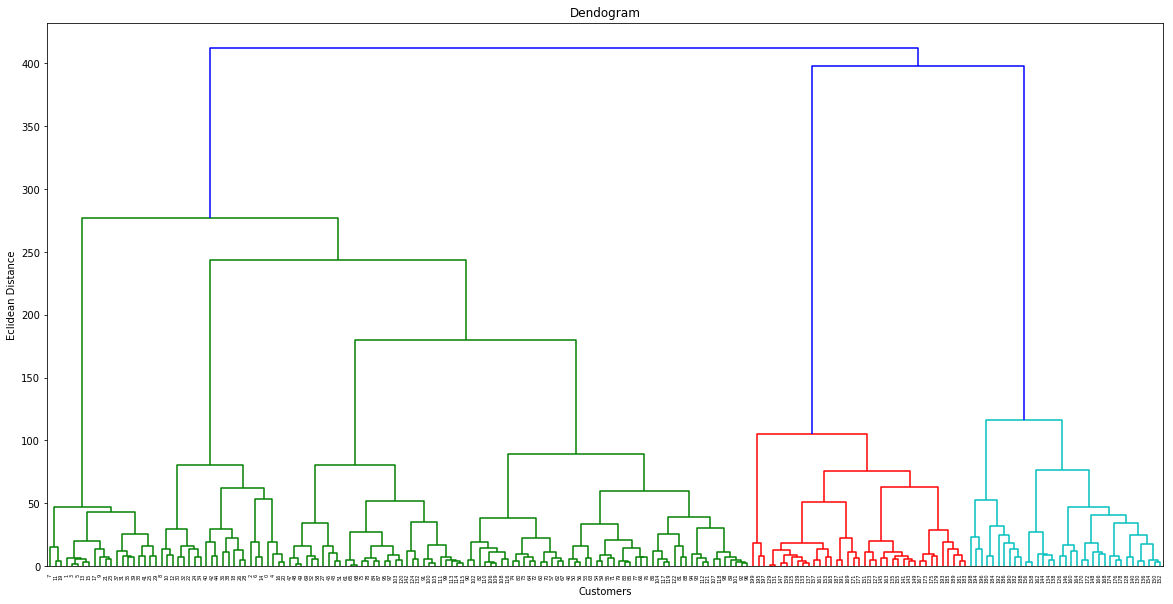

In [15]:
# using dendogram to select optimal number of clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (20,10))
dendrogram = sch.dendrogram(sch.linkage(data,method = "ward"))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Eclidean Distance")

From the dendrogram there seems to be six clusters, which is different from kmeans. 

In [16]:
# fitting heirachichal clustering to the data
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=6,affinity="euclidean",linkage="ward")
y_hc = hc.fit_predict(data)

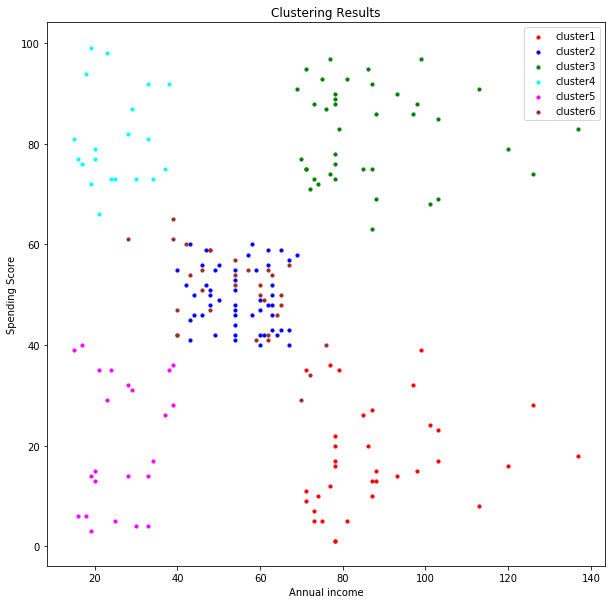

In [17]:
#Visualizing the clusters
# Lets take only two features Annual Income and spending score for visualizing. We could also do PCA for visualizing

plt.figure(figsize=(10,10))
plt.scatter(data.iloc[y_hc == 0, 2],data.iloc[y_hc == 0, 3],s = 10,c="red",label = "cluster1" )
plt.scatter(data.iloc[y_hc == 1, 2],data.iloc[y_hc == 1, 3],s = 10,c="blue",label = "cluster2" )
plt.scatter(data.iloc[y_hc == 2, 2],data.iloc[y_hc == 2, 3],s = 10,c="green",label = "cluster3" )
plt.scatter(data.iloc[y_hc == 3, 2],data.iloc[y_hc == 3, 3],s = 10,c="cyan",label = "cluster4" )
plt.scatter(data.iloc[y_hc == 4, 2],data.iloc[y_hc == 4, 3],s = 10,c="magenta",label = "cluster5" )
plt.scatter(data.iloc[y_hc == 5, 2],data.iloc[y_hc == 5, 3],s = 10,c="brown",label = "cluster6" )

#plot the centriods
#plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s = 80,c="yellow",label="centroids")
plt.title("Clustering Results")
plt.xlabel("Annual income")
plt.ylabel("Spending Score")
plt.legend()

From the plot, we can see the results are not good as cluster 6 and 2 are mixed. So, lets create the model again with 5 clusters and check the result.

In [18]:
hc = AgglomerativeClustering(n_clusters= 5,affinity="euclidean",linkage="ward")
y_hc = hc.fit_predict(data)

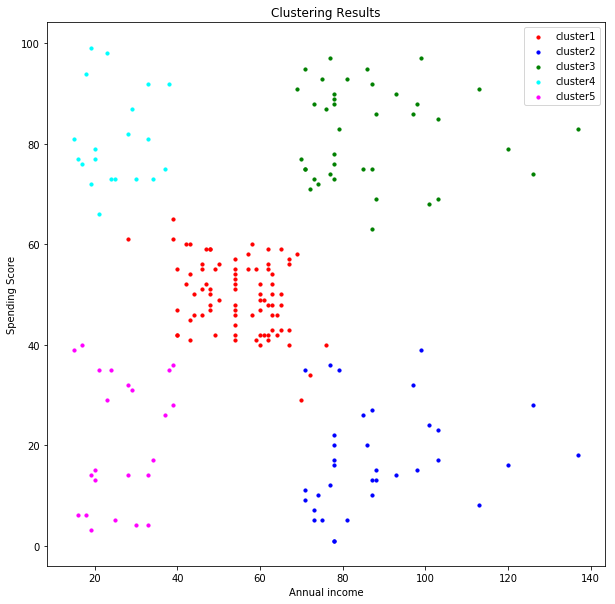

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(data.iloc[y_hc == 0, 2],data.iloc[y_hc == 0, 3],s = 10,c="red",label = "cluster1" )
plt.scatter(data.iloc[y_hc == 1, 2],data.iloc[y_hc == 1, 3],s = 10,c="blue",label = "cluster2" )
plt.scatter(data.iloc[y_hc == 2, 2],data.iloc[y_hc == 2, 3],s = 10,c="green",label = "cluster3" )
plt.scatter(data.iloc[y_hc == 3, 2],data.iloc[y_hc == 3, 3],s = 10,c="cyan",label = "cluster4" )
plt.scatter(data.iloc[y_hc == 4, 2],data.iloc[y_hc == 4, 3],s = 10,c="magenta",label = "cluster5" )

#plot the centriods
#plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s = 80,c="yellow",label="centroids")
plt.title("Clustering Results")
plt.xlabel("Annual income")
plt.ylabel("Spending Score")
plt.legend()

Now, the results look better, but still some points are mixed between cluster 1 and 2, whereas in kmeans clustering we could see clear separation.